<a href="https://colab.research.google.com/github/hams7107/ICT-1/blob/main/mnist_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [4]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6
469/469 [==============================] - 13s 8ms/step - loss: 0.3632 - sparse_categorical_accuracy: 0.9016 - val_loss: 0.1948 - val_sparse_categorical_accuracy: 0.9442
Epoch 2/6
469/469 [==============================] - 2s 5ms/step - loss: 0.1662 - sparse_categorical_accuracy: 0.9524 - val_loss: 0.1380 - val_sparse_categorical_accuracy: 0.9584
Epoch 3/6
469/469 [==============================] - 2s 5ms/step - loss: 0.1180 - sparse_categorical_accuracy: 0.9662 - val_loss: 0.1137 - val_sparse_categorical_accuracy: 0.9670
Epoch 4/6
469/469 [==============================] - 2s 5ms/step - loss: 0.0915 - sparse_categorical_accuracy: 0.9738 - val_loss: 0.0947 - val_sparse_categorical_accuracy: 0.9718
Epoch 5/6
469/469 [==============================] - 3s 6ms/step - loss: 0.0735 - sparse_categorical_accuracy: 0.9791 - val_loss: 0.0841 - val_sparse_categorical_accuracy: 0.9744
Epoch 6/6
469/469 [==============================] - 2s 5ms/step - loss: 0.0602 - sparse_categorical_acc

In [6]:
model.save('mnistmodel_1')

In [12]:
saved_model_path = '/content/mnistmodel_1'
model = tf.keras.models.load_model(saved_model_path)

In [13]:
import numpy as np
from PIL import Image


img_path = ".jpg"
img = Image.open('/content/sample_image (1).jpg').convert('L')
img = img.resize((28, 28))
img_array = np.array(img)
img_array = img_array / 255.0

input_img = np.expand_dims(img_array, axis=0)
input_img = np.expand_dims(input_img, axis=-1)

predictions = model.predict(input_img)


predicted_label = np.argmax(predictions[0])

print("Predicted label:", predicted_label)

1/1 [==============================] - 0s 57ms/step
Predicted label: 7


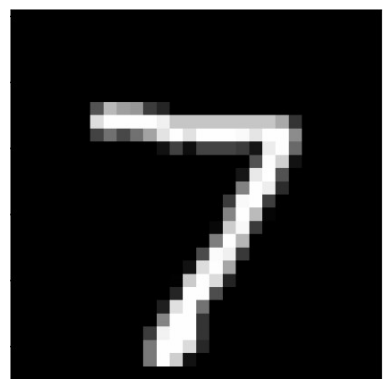

In [14]:
import matplotlib.pyplot as plt
from PIL import Image

# Load and display the image
img_path = "/content/sample_image (1).jpg"  # Replace with your image path
img = Image.open(img_path)
plt.imshow(img, cmap='gray')  # Display the image in grayscale
plt.axis('off')  # Hide axes
plt.show()